In [2]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


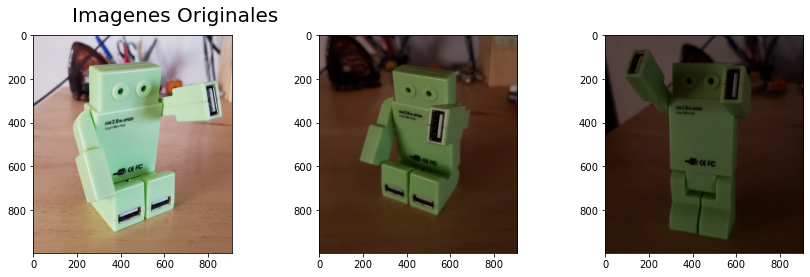

In [3]:
# Cargamos las 3 imagenes de Tito y las mostramos 

img1 = cv.imread('CoordCrom_1.png')
img2 = cv.imread('CoordCrom_2.png')
img3 = cv.imread('CoordCrom_3.png')

fig = plt.figure()#(constrained_layout=True)
fig.suptitle('Imagenes Originales', fontsize=20)
plt.subplots_adjust(right=2)
ax1 = plt.subplot(131)
ax1.imshow(img1[:,:,::-1])
ax2 = plt.subplot(132)
ax2.imshow(img2[:,:,::-1])
ax3 = plt.subplot(133)
ax3.imshow(img3[:,:,::-1])


In [4]:
# Algoritmo de Coordenadas Cromaticas

def Coordenadas_Cromaticas(img1):

    img1_b, img1_g, img1_r = cv.split(img1)
    R_G_B =  np.uint16(img1_b) + np.uint16(img1_g ) + np.uint16 (img1_r) 
    mask = R_G_B > 0
    imgCC_b = np.zeros((img1_b.shape[0],img1_b.shape[1]))
    imgCC_g = np.zeros((img1_g.shape[0],img1_g.shape[1]))
    imgCC_r = np.zeros((img1_r.shape[0],img1_r.shape[1]))
    imgCC_b[mask] = img1_b[mask]/R_G_B[mask] 
    imgCC_g[mask] = img1_g[mask]/R_G_B[mask] 
    imgCC_r[mask] = img1_r[mask]/R_G_B[mask] 
    imgCC = cv.merge((np.uint8(imgCC_r*255),np.uint8(imgCC_g*255),np.uint8(imgCC_b*255)))
    
    return imgCC

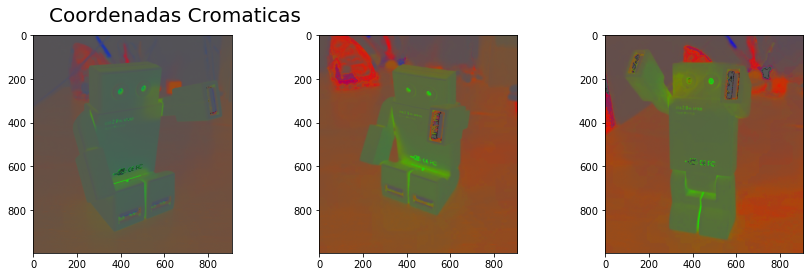

In [5]:
fig = plt.figure()#(constrained_layout=True)
fig.suptitle('Coordenadas Cromaticas', fontsize=20)
plt.subplots_adjust(right=2)
ax1 = plt.subplot(131)
imgCC1 = Coordenadas_Cromaticas(img1)
ax1.imshow(imgCC1)
ax1 = plt.subplot(132)
imgCC2 = Coordenadas_Cromaticas(img2)
ax1.imshow(imgCC2)
ax1 = plt.subplot(133)
imgCC3 = Coordenadas_Cromaticas(img3)
ax1.imshow(imgCC3)

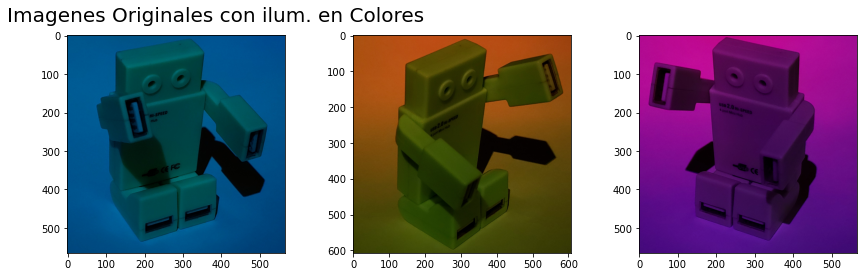

In [39]:
# Cargamos las 3 imagenes de Tito con diferentes colores de iluminacion

img1 = cv.imread('WP_B.png')
img2 = cv.imread('WP_O.png')
img3 = cv.imread('WP_R.png')
#img1 = cv.imread('test_blue.png')
#img2 = cv.imread('test_green.png')
#img3 = cv.imread('test_red.png')

fig = plt.figure()#(constrained_layout=True)
fig.suptitle('Imagenes Originales con ilum. en Colores ', fontsize=20)
plt.subplots_adjust(right=2)
ax1 = plt.subplot(131)
ax1.imshow(img1[:,:,::-1])
ax2 = plt.subplot(132)
ax2.imshow(img2[:,:,::-1])
ax3 = plt.subplot(133)
ax3.imshow(img3[:,:,::-1])


In [7]:
# Algoritmo de White-Patch

def White_Patch(img):
    
    img_b, img_g, img_r = cv.split(img) 
    imgWP_b = np.zeros((img_b.shape[0],img_b.shape[1]))
    imgWP_g = np.zeros((img_g.shape[0],img_g.shape[1]))
    imgWP_r = np.zeros((img_r.shape[0],img_r.shape[1]))
    imgWP_b = np.uint8((255 / img_b.max()) * img_b  ) 
    imgWP_g = np.uint8((255 / img_g.max()) * img_g  )
    imgWP_r = np.uint8((255 / img_r.max()) * img_r  )  
    imgWP = cv.merge((imgWP_r,imgWP_g,imgWP_b))

    return imgWP


In [8]:
def Cambiar_Saturacion(img):
    
    cte_ajuste = -0.5
    im_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    im_hsv[:,:,1] = np.minimum(im_hsv[:,:,1] * (1 + cte_ajuste), 255).astype('uint8')
    img = cv.cvtColor(im_hsv, cv.COLOR_HSV2BGR)
    
    return img

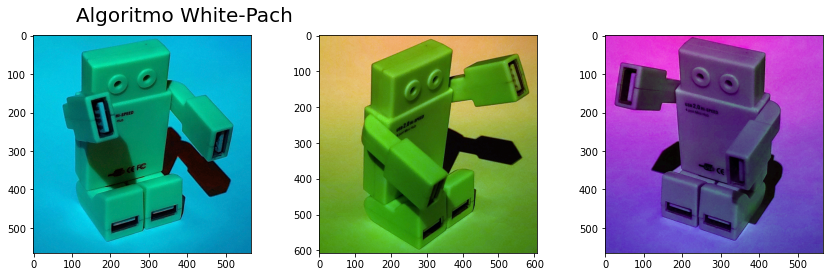

In [9]:
# White-Path sin modificar la imagen original

fig = plt.figure()#(constrained_layout=True)
fig.suptitle('Algoritmo White-Pach', fontsize=20)
plt.subplots_adjust(right=2)
ax1 = plt.subplot(131)
imgWP1 = White_Patch(img1)
ax1.imshow(imgWP1)
ax1 = plt.subplot(132)
imgWP2 = White_Patch(img2)
ax1.imshow(imgWP2)
ax1 = plt.subplot(133)
imgWP3 = White_Patch(img3)
ax1.imshow(imgWP3)


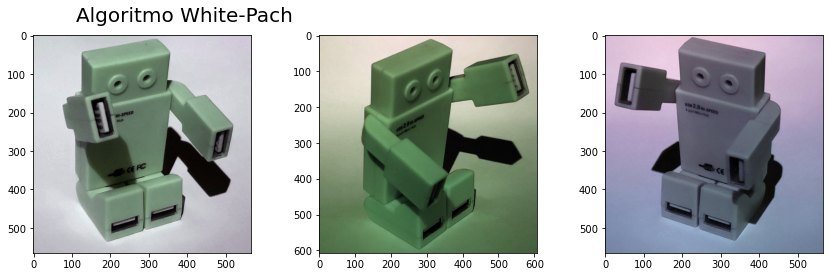

In [10]:
# White-Path alterando la saturacion de la imagen original

img11 = Cambiar_Saturacion(img1)
img22 = Cambiar_Saturacion(img2)
img33 = Cambiar_Saturacion(img3)

fig = plt.figure()#(constrained_layout=True)
fig.suptitle('Algoritmo White-Pach', fontsize=20)
plt.subplots_adjust(right=2)
ax1 = plt.subplot(131)
imgWP1 = White_Patch(img11)
ax1.imshow(imgWP1)
ax1 = plt.subplot(132)
imgWP2 = White_Patch(img22)
ax1.imshow(imgWP2)
ax1 = plt.subplot(133)
imgWP3 = White_Patch(img33)
ax1.imshow(imgWP3)
